In [2]:
# iris data 불러오기
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import markers
from rich import pretty

import plot_decision_regions as pltreg
from adaline import AdalineGD
from adalinesgd import AdalineSGD
from perceptron import Perceptron

In [3]:
# calling rich
pretty.install()

In [4]:
s = os.path.join('https://archive.ics.uci.edu', 'ml',
                 'machine-learning-databases',
                 'iris', 'iris.data')

print('URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# 첫 번째 특성열 = 꽃받침 길이, 세 번째 특성열 = 꽃잎 길이
# setosa와 vesicolor를 선택
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출
X = df.iloc[0:100, [0, 2]].values

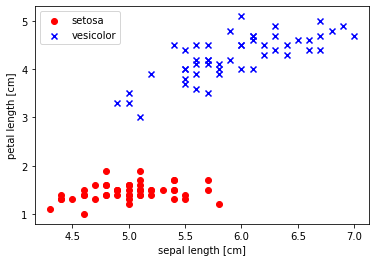

In [6]:
# 산점도
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='vesicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## 2.2 퍼셉트론 알고리즘 구현

github/study_room/python_ML/perceptron.py에 구현

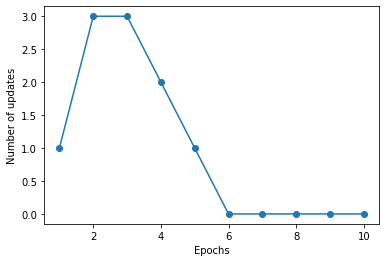

/Users/sunghyouk/github/study_room/python_ML/plot_decision_regions.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


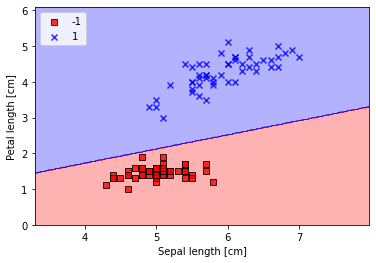

In [7]:
# 퍼셉트론 알고리즘 훈련
# 에포크 대비 잘못 분류된 오차를 그래프로
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_)+1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# 결정 영역 시각화
pltreg.plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## 2.3 ADAptive LInear NEuron, ADALINE

연속 함수로 비용 함수를 정의하고 최소화하는 핵심 개념
가중치를 업데이트하는 데 선형 활성화 함수 $\phi(z)$ 를 사용, 이는 항등 함수

$$\phi(w^T x)=w^T x$$

### 2.3.1 경사 하강법으로 비용 함수 최소화

종종 최소화하려는 비용 함수가 목적 함수

장점 1) 비용 함수가 미분 가능  
장점 2) 볼록 함수

경사 하강법 (gradient descent)을 적용  
모든 샘플을 기반으로 가중치 업데이트 - **배치 경사 하강법** (batch gradient descent)

### 2.3.2 파이썬으로 아달린 구현

AdalineGD class는 github/study_room/python_ML/adaline.py에 구현  
최적으로 수렴하는 좋은 학습률 $\eta$를 찾기 위해 여러 번 실험을 해야 함  
  * 퍼셉트론 하이퍼파라미터: 분류 모델이 최적의 성능을 내기 위해 다양한 하이퍼파라미터 값을 자동으로 찾는 방법: *to* Chapter 6



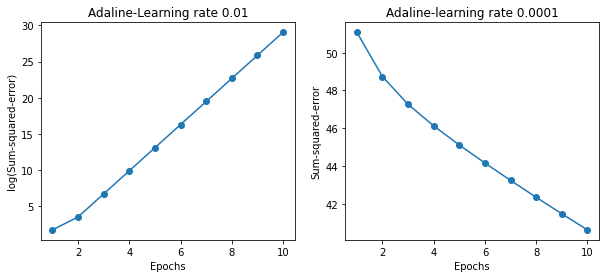

In [8]:
# eta = 0.1 or 0.0001
# 에포크 횟수 대비 비용 그래프 그려 보기
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline-Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline-learning rate 0.0001')
plt.show()

### 2.3.3 특성 스케일을 조정하여 경사 하강법 결과 향상

특성 스케일을 조정 *to* Chapter 3, Chapter 4  
표준화: 평균이 0이고 단위 분산을 갖는 표준 정규 분포의 성질을 부여, 경사 하강법 학습이 좀 더 빠르게 수렴되도록 도움
  * 원본 데이터셋을 정규 분포로 만드는 것은 아님


In [9]:
# 표준화
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

### 2.3.4 대규모 머신 러닝과 확률적 경사 하강법

확률적 경사 하강법 (stochastic gradient descent) - 반복 또는 온라인 경사 하강법
  * 샘플에 대해 조금씩 가중치를 업데이트 - 가중치가 더 자주 업데이트되기 때문에 수렴 속도가 훨씬 빠름
  * 비선형 비용 함수를 다룰 때 얕은 지역 최소값을 더 쉽게 탈출할 수 있음 *to* Chapter 12
  * 훈련 샘플 순서를 무작위하게 주입
  * 순환되지 않도록 에포크마다 훈련 데이터셋을 섞는 것이 좋음
  * 새로운 훈련 데이터가 도착하는 대로 훈련

*reference)* 미니 배치 학습 (mini-batch learning): 훈련 데이터의 작은 일부분으로 배치 경사 하강법을 적용
  * 훈련 데이터의 작은 일부분으로 배치 경사 하강법을 적용
  * 가중치 업데이트가 더 자주 일어나므로 수렴 속도가 더 빠름
  * for 문에서 벡터화된 연산으로 바꾸어 주므로 학습 알고리즘의 계산 효율성이 크게 향상

AdalineSGD class는 github/study_room/python_ML/adalinesgd.py에 구현

/Users/sunghyouk/github/study_room/python_ML/plot_decision_regions.py:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


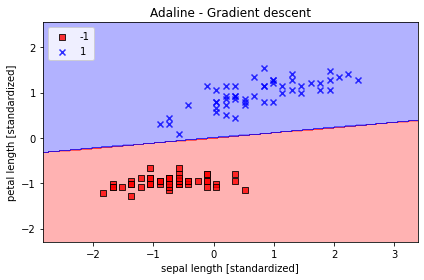

In [10]:
# Adaline 모델 훈련 / 학습률 = 0.01, 목적: 몇번의 에포크만에 수렴하는지?
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

pltreg.plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

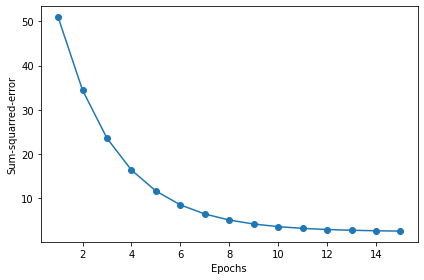

In [11]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squarred-error')
plt.tight_layout()
plt.show()

In [12]:
# AdalineSGD 모델 훈련, 그래프 그리기
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

<adalinesgd.AdalineSGD object at 0x7fbe562448b0>

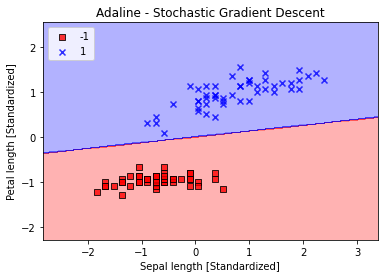

In [13]:
pltreg.plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Sepal length [Standardized]')
plt.ylabel('Petal length [Standardized]')
plt.legend(loc='upper left')
plt.show()

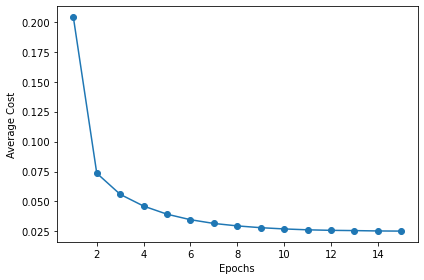

In [14]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

## 2.4 요약

### 배운 것

* 퍼셉트론
* 경사 하강법 - 적응형 선형 뉴런 훈련하기
* 확률적 경사 하강법 - 온라인 학습으로 훈련하기

### 앞으로

* 사이킷런 - fit, predict 메서드와 동일한 바탕으로 구현되어 있다.

### 다음 장에서

* 로지스틱 회귀 - 클래스 확률 모델링
* 서포트 벡터 머신 - 비선형 결정 경계
* 트리 기반 알고리즘 - 앙상블 분류기에 널리 사용